# Sentiment Analysis on IMDB Data

In this project we will do Sentiment Analysis of movie reviews, using the [imbd dataset](https://ai.stanford.edu/~amaas/data/sentiment/) (or the .csv version from [kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)). We will classify each review as either positive or negative.

In [2]:
# Import libraries needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, we will examine the data:

### Data Pre-processing

In [3]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)

(50000, 2)


In [4]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Our data is comprised by the reviews and the sentiment. There is no missing values. Also, both variables are strings. Each sentiment can be either positive or negative. Now, let's see what is the distribution of the sentiments:

In [8]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

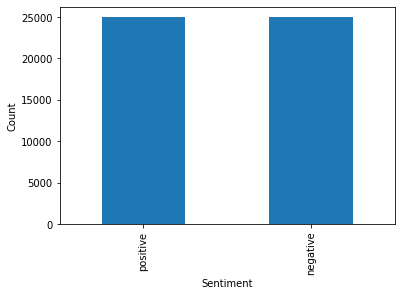

In [9]:
imdb_data['sentiment'].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()

Each sentiment is distributed equally, the dataset is balanced.

In order to train a classifier, we need to convert text to string format. First, we will do it with the labels. Positive values will be represent as 1 and negative as 0.

In [10]:
imdb_data['sentiment'] = imdb_data.sentiment.astype('category')
mapping = {'positive': 1, 'negative': 0}
imdb_data.sentiment.replace(mapping, inplace=True)

In [11]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


## Data Splitting

The data has 50,000 reviews. We can split them in 80%-20%, 40,000 for training set and 10,000 for testing set. However, 40,000 is a lot of data, so we will work with 5,000 observation only and split them in the same way.

In [12]:
def data_split_80_20(data, total_obs=5000):
    samples = np.random.choice(len(data), total_obs, replace=False)
    train_samples = int(0.8 * total_obs)
    new_data = data.iloc[samples]
    train = new_data[:train_samples]
    val = new_data[train_samples:]
    return train.iloc[:, 0], val.iloc[:, 0], train.iloc[:, 1] , val.iloc[:, 1]
    

In [13]:
x_train, x_val, y_train, y_val = data_split_80_20(imdb_data)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4000,) (4000,)
(1000,) (1000,)


## Vectorizer

Now, we need to transform our reviews into numbers. The way we will do it is by the Bag-Of-Words method using sklearn's CountVectorizer. With text vectorization, each review is represented by a vector of the counts of words from a vocabulary in that document. We will limit features to 10,000.

In [14]:
cv = CountVectorizer(max_features=10000) # only unigrams
cv_x_train = cv.fit_transform(x_train)
cv_x_train = cv_x_train.toarray()

In [15]:
cv_x_train.shape

(4000, 10000)

In [16]:
cv_x_val = cv.transform(x_val)
cv_x_val = cv_x_val.toarray()

## SGD Classifier

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm that approximates the gradient of the loss at each time. 

Sklearn's SGD Classifier implements regularized linear models with SGD learning. Two of the losses provided by it are 'hinge' that gives us a Support Vector Machine (SVM) algorithm and 'log' that gives us a Logistic Regression Algorithm.

In [17]:
# Training Classifier (SVM)
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(cv_x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
svm_predictions = svm.predict(cv_x_val)
svm_score = accuracy_score(y_val, svm_predictions)
print("svm_accuracy :", svm_score)

svm_accuracy : 0.83


In [19]:
# Training Classifier (logistic regression)
log_reg = SGDClassifier(loss='log', random_state=42)
log_reg.fit(cv_x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
log_reg_predictions = log_reg.predict(cv_x_val)
log_reg_score = accuracy_score(y_val, log_reg_predictions)
print("log_reg_accuracy :", log_reg_score)

log_reg_accuracy : 0.829


The accuracies we obtained using Support Vector Machine (SVM) and Logistic Regression with the Stochastic Gradient Descent (SGD) algorithm using 5,000 observations (4,000 for training, 1,000 for testing) are 0.83 for SVM and 0.829 for logistic regression. Our mission now is to get better results through experimentation:

## Experiments

5,000 observations did not take that long to run, let's try incrementing a little bit the data to see if we can get better results. In theory the more data the better, however, in practice more data means more complexity, the number of calculations increment and sometimes our machine cannot handle that. Of course, 40,000 might take the longest because it is the whole size of the data. To try to reduce computational complexity we will reduce the number of features our Vectorizer is going to use to 10,000.

In [21]:
def summary_report(classifier, x_val, y_val, predictions):
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, predictions))
    
    plot_confusion_matrix(classifier, x_val, y_val)
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_val, predictions, target_names=['negative', 'positive']))

svm accuracy with 5000 observations: 0.8230
Confusion Matrix:
[[379 128]
 [ 49 444]]


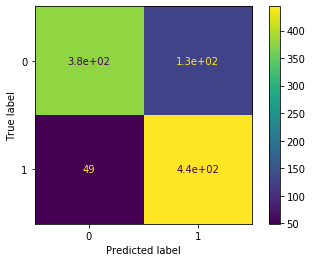


Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.75      0.81       507
    positive       0.78      0.90      0.83       493

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000

logistc regression accuracy with 5000 observations: 0.8390
Confusion Matrix:
[[429  78]
 [ 83 410]]


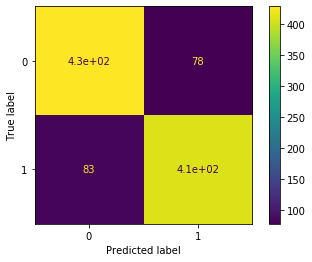


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84       507
    positive       0.84      0.83      0.84       493

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

svm accuracy with 10000 observations: 0.8340
Confusion Matrix:
[[894 116]
 [216 774]]


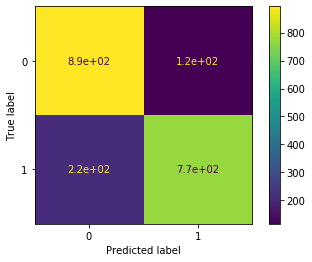


Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.89      0.84      1010
    positive       0.87      0.78      0.82       990

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

logistc regression accuracy with 10000 observations: 0.8530
Confusion Matrix:
[[859 151]
 [143 847]]


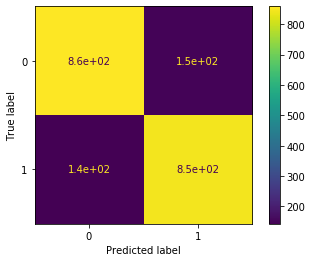


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      1010
    positive       0.85      0.86      0.85       990

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

svm accuracy with 15000 observations: 0.8437
Confusion Matrix:
[[1136  349]
 [ 120 1395]]


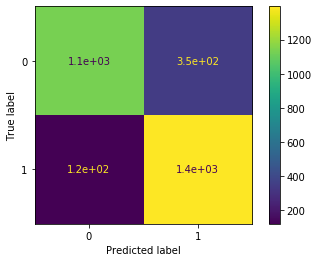


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.76      0.83      1485
    positive       0.80      0.92      0.86      1515

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000

logistc regression accuracy with 15000 observations: 0.8630
Confusion Matrix:
[[1287  198]
 [ 213 1302]]


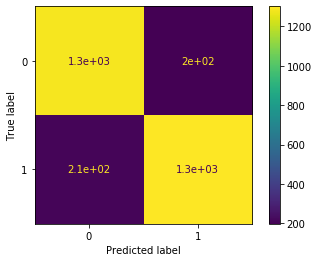


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      1485
    positive       0.87      0.86      0.86      1515

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

svm accuracy with 20000 observations: 0.8728
Confusion Matrix:
[[1758  246]
 [ 263 1733]]


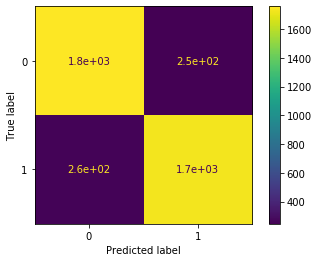


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      2004
    positive       0.88      0.87      0.87      1996

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000

logistc regression accuracy with 20000 observations: 0.8720
Confusion Matrix:
[[1657  347]
 [ 165 1831]]


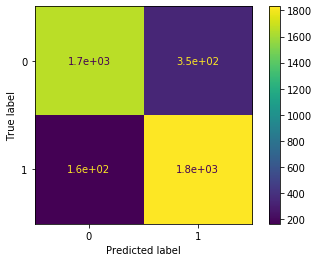


Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87      2004
    positive       0.84      0.92      0.88      1996

    accuracy                           0.87      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.88      0.87      0.87      4000

svm accuracy with 40000 observations: 0.8765
Confusion Matrix:
[[3455  601]
 [ 387 3557]]


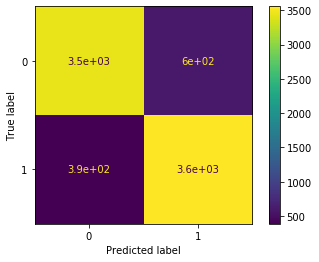


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.85      0.87      4056
    positive       0.86      0.90      0.88      3944

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000

logistc regression accuracy with 40000 observations: 0.8775
Confusion Matrix:
[[3609  447]
 [ 533 3411]]


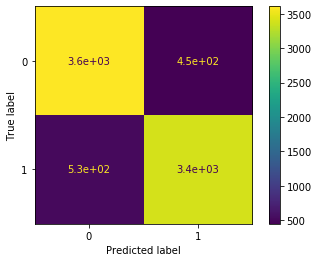


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      4056
    positive       0.88      0.86      0.87      3944

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [23]:
num_obs = [5000, 10000, 15000, 20000, 40000]
svm_acc = []
log_reg_acc = []

for i in num_obs:
    x_train, x_val, y_train, y_val = data_split_80_20(imdb_data, i)
    cv = CountVectorizer(max_features=10000) # only unigrams
    cv_x_train = cv.fit_transform(x_train)
    cv_x_train = cv_x_train.toarray()
    cv_x_val = cv.transform(x_val)
    cv_x_val = cv_x_val.toarray()
    
    # Training Classifier (SVM)
    svm = SGDClassifier(loss='hinge', random_state=42)
    svm.fit(cv_x_train, y_train)
    
    svm_predictions = svm.predict(cv_x_val)
    svm_score = accuracy_score(y_val, svm_predictions)
    svm_acc.append(svm_score)
    print("svm accuracy with {} observations: {:.4f}".format(i, svm_score))
    summary_report(svm, cv_x_val, y_val, svm_predictions)
    
    # Logistic Regression 
    log_reg = SGDClassifier(loss='log', random_state=42)
    log_reg.fit(cv_x_train, y_train) 
    
    log_reg_predictions = log_reg.predict(cv_x_val)
    log_reg_score = accuracy_score(y_val, log_reg_predictions)
    log_reg_acc.append(log_reg_score)
    print("logistc regression accuracy with {} observations: {:.4f}".format(i, log_reg_score))
    summary_report(log_reg, cv_x_val, y_val, log_reg_predictions)

Let's see how the graph of num_obs vs acc looks like. It is important to remember that we are sampling a certain number of observations, so for sure we will have some noise, and it will vary a little bit each time we sample.

/Users/bryanmonca/Workspace/cmsi-634-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


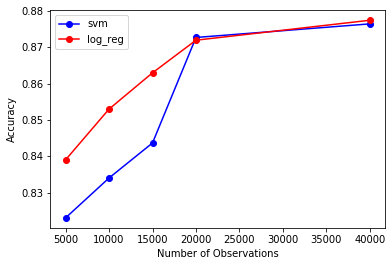

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#fig.suptitle('Iris Dataset Reconstruction Loss')

ax = fig.add_subplot(1, 1, 1)
ax.plot(num_obs, svm_acc, marker='o', color='b', label='svm')
ax.plot(num_obs, log_reg_acc, marker='o', color='r', label='log_reg')
ax.legend(loc='best')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Observations')
plt.show()

We can also see that the more observations we have the better our accuracy is. Additionally, the logistic regression has a little bit better performance than the svm on average. 

Limiting the number of features to 10,000 helped us reduce the time of computation. Nevertheless, 40,000 takes a while and the running time might increase as we increase features in the next steps. Because of more data can take all our memory, we will continue experimenting with 20,000 observations only.

In [33]:
x_train, x_val, y_train, y_val = data_split_80_20(imdb_data, 20000)

Now, let's experiment with different n-grams using the same Bag-of-words method (CountVectorizer). We will consider from unigram up to trigram. When going to the next n-gram we will consider all previous n-grams and the current one.

svm accuracy with 1-gram: 0.8628
Confusion Matrix:
[[1561  368]
 [ 181 1890]]


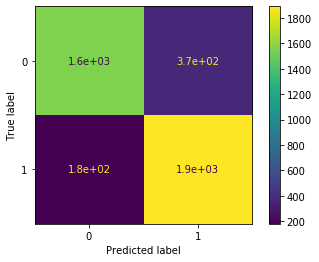


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.81      0.85      1929
    positive       0.84      0.91      0.87      2071

    accuracy                           0.86      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.87      0.86      0.86      4000

logistc regression accuracy with 1-gram: 0.8688
Confusion Matrix:
[[1653  276]
 [ 249 1822]]


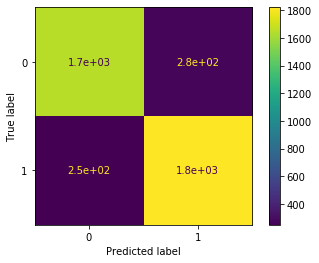


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      1929
    positive       0.87      0.88      0.87      2071

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000

svm accuracy with 2-gram: 0.8738
Confusion Matrix:
[[1743  186]
 [ 319 1752]]


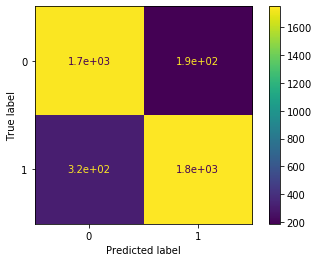


Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.90      0.87      1929
    positive       0.90      0.85      0.87      2071

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.88      0.87      0.87      4000

logistc regression accuracy with 2-gram: 0.8785
Confusion Matrix:
[[1708  221]
 [ 265 1806]]


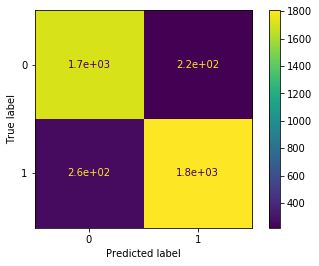


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      1929
    positive       0.89      0.87      0.88      2071

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000

svm accuracy with 3-gram: 0.8725
Confusion Matrix:
[[1694  235]
 [ 275 1796]]


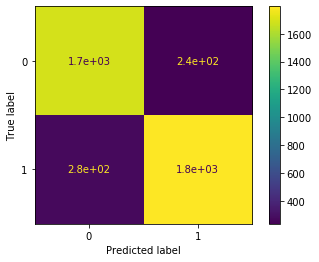


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1929
    positive       0.88      0.87      0.88      2071

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000

logistc regression accuracy with 3-gram: 0.8768
Confusion Matrix:
[[1706  223]
 [ 270 1801]]


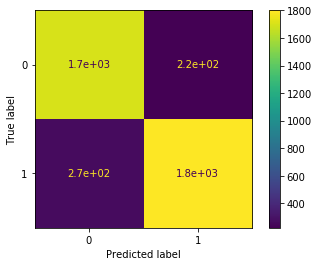


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1929
    positive       0.89      0.87      0.88      2071

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



In [34]:
n_grams = [1, 2, 3]
svm_acc = []
log_reg_acc = []

for i in n_grams:
    cv = CountVectorizer(max_features=10000, ngram_range=(1, i))
    cv_x_train = cv.fit_transform(x_train)
    cv_x_train = cv_x_train.toarray()
    cv_x_val = cv.transform(x_val)
    cv_x_val = cv_x_val.toarray()
    
    # Training Classifier (SVM)
    svm = SGDClassifier(loss='hinge', random_state=42)
    svm.fit(cv_x_train, y_train)
    
    svm_predictions = svm.predict(cv_x_val)
    svm_score = accuracy_score(y_val, svm_predictions)
    svm_acc.append(svm_score)
    print("svm accuracy with {}-gram: {:.4f}".format(i, svm_score))
    summary_report(svm, cv_x_val, y_val, svm_predictions)
    
    # Logistic Regression 
    log_reg = SGDClassifier(loss='log', random_state=42)
    log_reg.fit(cv_x_train, y_train) 
    
    log_reg_predictions = log_reg.predict(cv_x_val)
    log_reg_score = accuracy_score(y_val, log_reg_predictions)
    log_reg_acc.append(log_reg_score)
    print("logistc regression accuracy with {}-gram: {:.4f}".format(i, log_reg_score))
    summary_report(log_reg, cv_x_val, y_val, log_reg_predictions)

/Users/bryanmonca/Workspace/cmsi-634-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


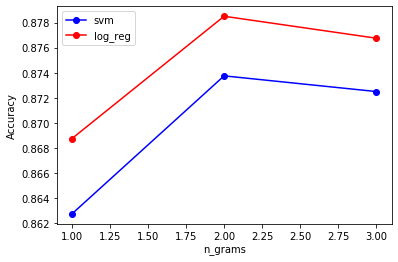

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = fig.add_subplot(1, 1, 1)
ax.plot(n_grams, svm_acc, marker='o', color='b', label='svm')
ax.plot(n_grams, log_reg_acc, marker='o', color='r', label='log_reg')
ax.legend(loc='best')
ax.set_ylabel('Accuracy')
ax.set_xlabel('n_grams')
plt.show()

We can see that the best accuracy for both models is when including bigrams. The accuracy of SVM increases to 0.8738 and the accuracy of Logistic Regression to 0.8785.

Another thing we can do to try to increase accuracy is to delete all stop words. We will use the unigram-bigram with our models and delete stop words:

svm accuracy with 2-gram and no stop_words: 0.8550
Confusion Matrix:
[[1668  261]
 [ 319 1752]]


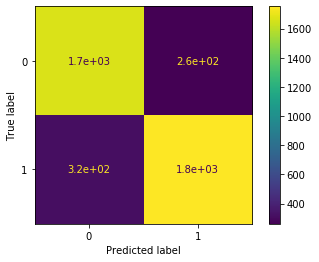


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1929
    positive       0.87      0.85      0.86      2071

    accuracy                           0.85      4000
   macro avg       0.85      0.86      0.85      4000
weighted avg       0.86      0.85      0.86      4000

logistc regression accuracy with 2-gram and no stop_words: 0.8668
Confusion Matrix:
[[1648  281]
 [ 252 1819]]


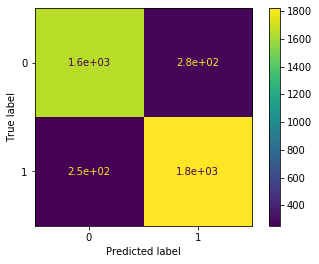


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      1929
    positive       0.87      0.88      0.87      2071

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



In [42]:
cv = CountVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
cv_x_train = cv.fit_transform(x_train)
cv_x_train = cv_x_train.toarray()
cv_x_val = cv.transform(x_val)
cv_x_val = cv_x_val.toarray()

# Training Classifier (SVM)
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(cv_x_train, y_train)
    
svm_predictions = svm.predict(cv_x_val)
svm_score = accuracy_score(y_val, svm_predictions)
svm_acc.append(svm_score)
print("svm accuracy with 2-gram and no stop_words: {:.4f}".format(svm_score))
summary_report(svm, cv_x_val, y_val, svm_predictions)

# Logistic Regression 
log_reg = SGDClassifier(loss='log', random_state=42)
log_reg.fit(cv_x_train, y_train) 

log_reg_predictions = log_reg.predict(cv_x_val)
log_reg_score = accuracy_score(y_val, log_reg_predictions)
log_reg_acc.append(log_reg_score)
print("logistc regression accuracy with 2-gram and no stop_words: {:.4f}".format(log_reg_score))
summary_report(log_reg, cv_x_val, y_val, log_reg_predictions)

With stop words deleted our results do not improve, in fact, it decreases from 0.8738 to 0.8550 for SVM, and from 0.8785 to 0.8668 for Logistic Regression. 

Often, we can achieve slightly better results if instead of counts of words we use something called term frequency times inverse document frequency (or tf-idf). The intuition behind TF-IDF addresses the problem of using just the frequency of terms inside a document to predict sentiment. Although some terms may have a high frequency inside documents they may not be so relevant for describing a given document in which they appear. We will try tf-idf with our best models so far.

svm accuracy with 2-gram and tfidf: 0.8972
Confusion Matrix:
[[1717  212]
 [ 199 1872]]


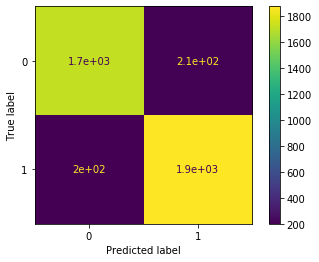


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      1929
    positive       0.90      0.90      0.90      2071

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000

logistc regression accuracy with 2-gram and tfidf: 0.8958
Confusion Matrix:
[[1675  254]
 [ 163 1908]]


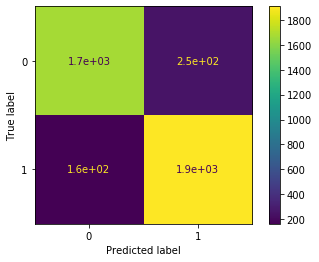


Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      1929
    positive       0.88      0.92      0.90      2071

    accuracy                           0.90      4000
   macro avg       0.90      0.89      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [53]:
cv = CountVectorizer(max_features=10000, ngram_range=(1, 2))
cv_x_train = cv.fit_transform(x_train)
cv_x_train = cv_x_train.toarray()
cv_x_val = cv.transform(x_val)
cv_x_val = cv_x_val.toarray()

#TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf_x_train = tfidf_transformer.fit_transform(cv_x_train)
tfidf_x_val = tfidf_transformer.transform(cv_x_val)

# Training Classifier (SVM)
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(tfidf_x_train, y_train)
    
svm_predictions = svm.predict(tfidf_x_val)
svm_score = accuracy_score(y_val, svm_predictions)
svm_acc.append(svm_score)
print("svm accuracy with 2-gram and tfidf: {:.4f}".format(svm_score))
summary_report(svm, tfidf_x_val, y_val, svm_predictions)

# Logistic Regression 
log_reg = SGDClassifier(loss='log', random_state=42)
log_reg.fit(tfidf_x_train, y_train) 

log_reg_predictions = log_reg.predict(tfidf_x_val)
log_reg_score = accuracy_score(y_val, log_reg_predictions)
log_reg_acc.append(log_reg_score)
print("logistc regression accuracy with 2-gram and tfidf: {:.4f}".format(log_reg_score))
summary_report(log_reg, tfidf_x_val, y_val, log_reg_predictions)

As expected!! For both models, the accuracy increases when using TFIDF to approximately 0.90!

## Graphs of results

Now we will graph the accuracy of all the models we have tried so far using 20,000 observations:

/Users/bryanmonca/Workspace/cmsi-634-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


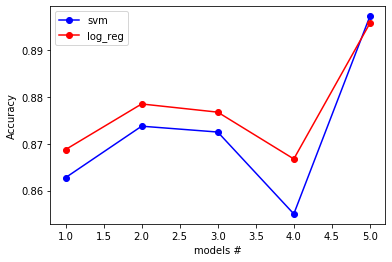

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1, len(svm_acc)+1), svm_acc, marker='o', color='b', label='svm')
ax.plot(range(1, len(log_reg_acc)+1), log_reg_acc, marker='o', color='r', label='log_reg')
ax.legend(loc='best')
ax.set_ylabel('Accuracy')
ax.set_xlabel('models #')
plt.show()

To sum up, we used the SGDClassifier with two different losses: 'hinge' that gives us the Support Vector Machine (SVM) algorithm and 'log' that gives us Logistic Regression.

Due to memory consumption, we used only 20,000 observations and we also used the maximum 10,000 features.

Our features varied in each of the models we did for logistic regression and svm:

    1. unigrams only
    2. unigrams and bigrams
    3. unigrams, bigrams and trigrams
 
We then selected our best models that were unigrams and bigrams and proceed to:
    
    4. No stop-words
     
Stop-words do not increase our accuracy value, so did not change our model. Then, we proceded to add:

    5. unigrams, bigrams, tf-idf
    
TF-IDF gave us the highest accuracy for both Logistic Regression and SVM. The accuracies were approximately 90%. On average our Logistic Regression was better than SVM.
       

## Future Work

To increase our performance, we could try using Neural Networks (NN) or Recurrent Neural Networks (RNN). 

Also, we could try increasing the dataset size using a more powerful computer. Maybe we could use Google Colab's [free GPU](https://colab.research.google.com/notebooks/welcome.ipynb).